# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df=pd.read_csv('cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.shape

(103, 10)

In [6]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [10]:
def check_dist(df, var):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

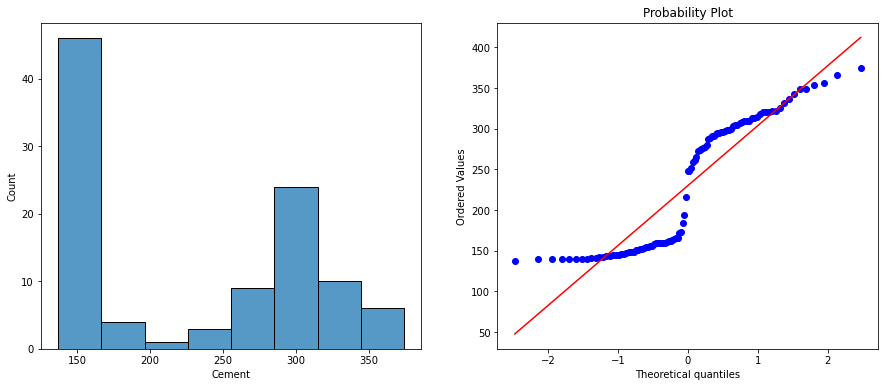

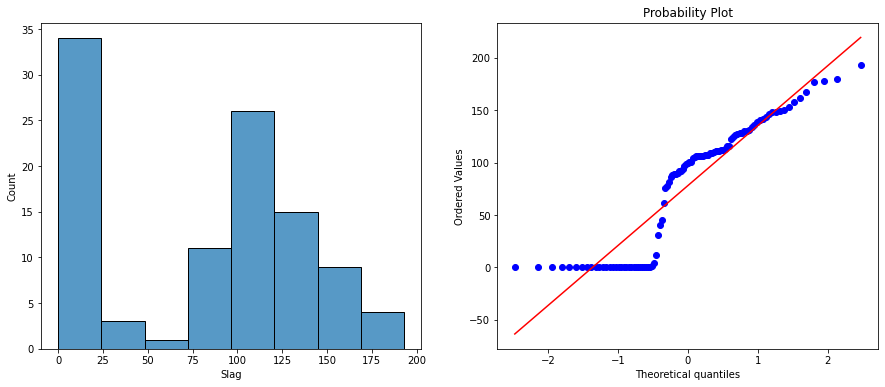

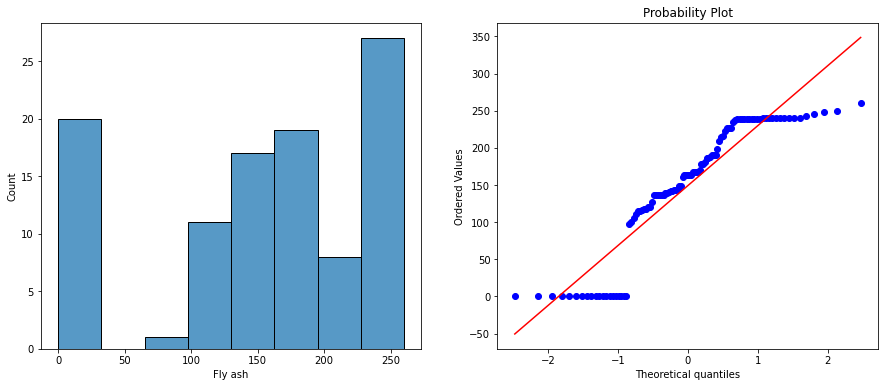

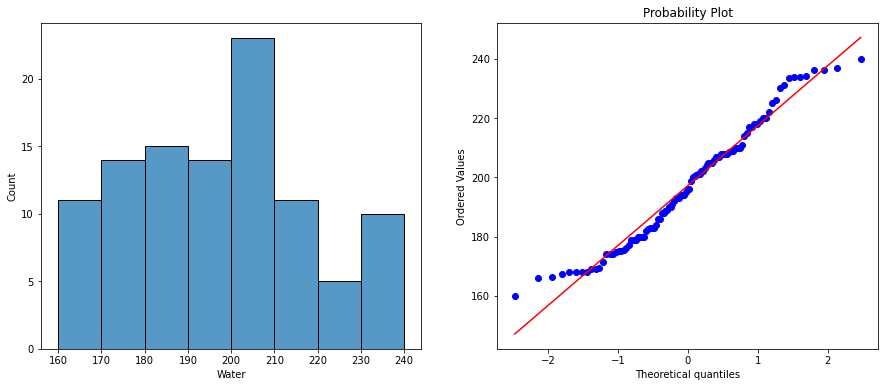

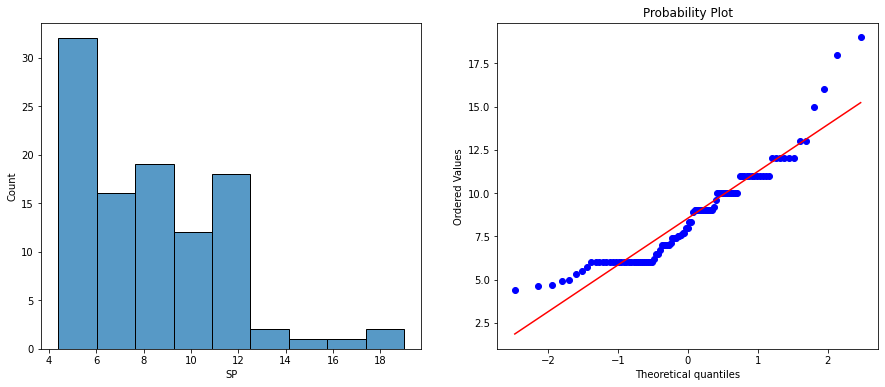

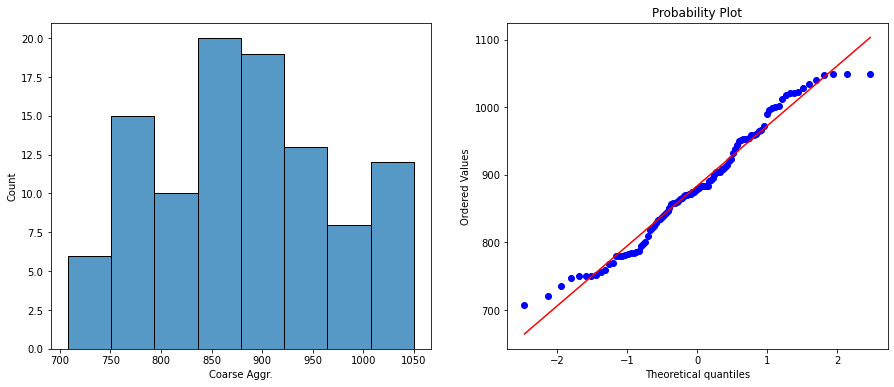

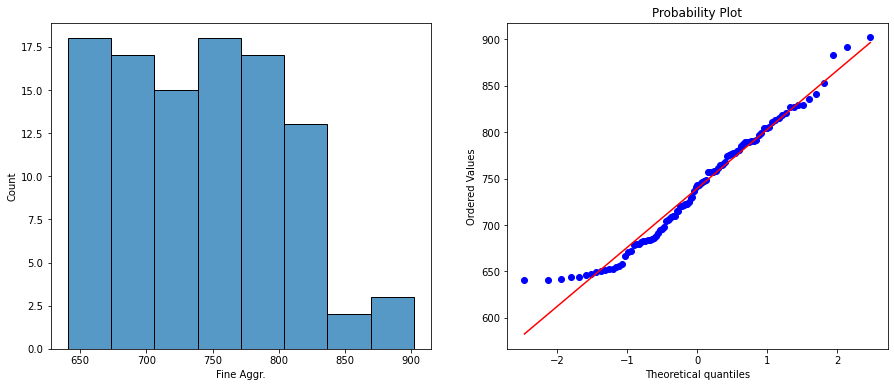

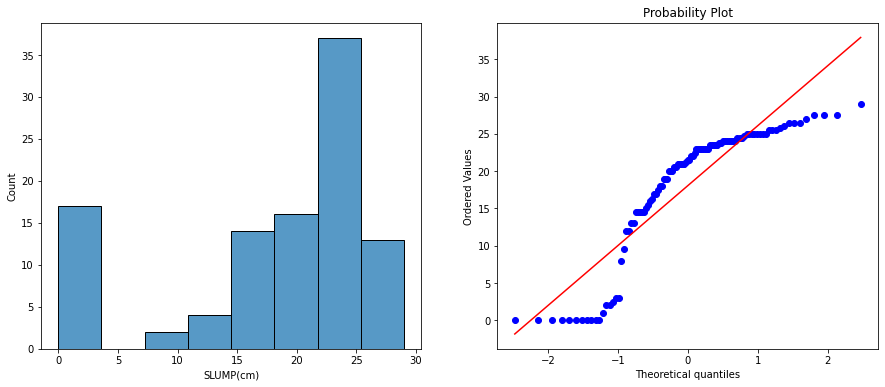

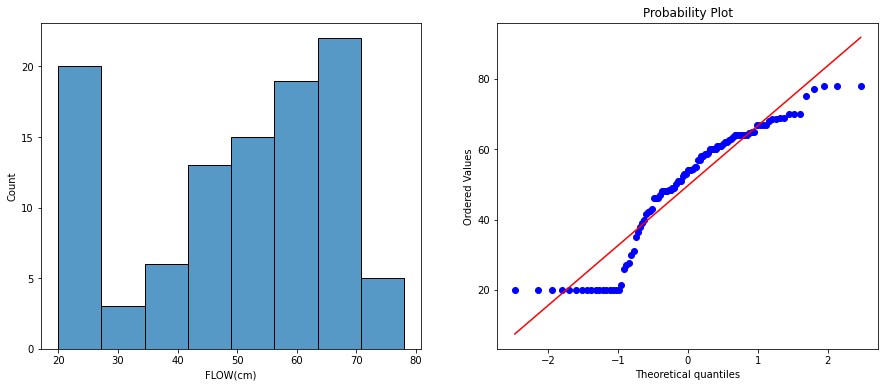

In [11]:
for col in df.drop("Compressive Strength (28-day)(Mpa)", axis=1).columns:
    check_dist(df, col)

In [12]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df).corr().style.applymap(color_red)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


In [13]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


<AxesSubplot:>

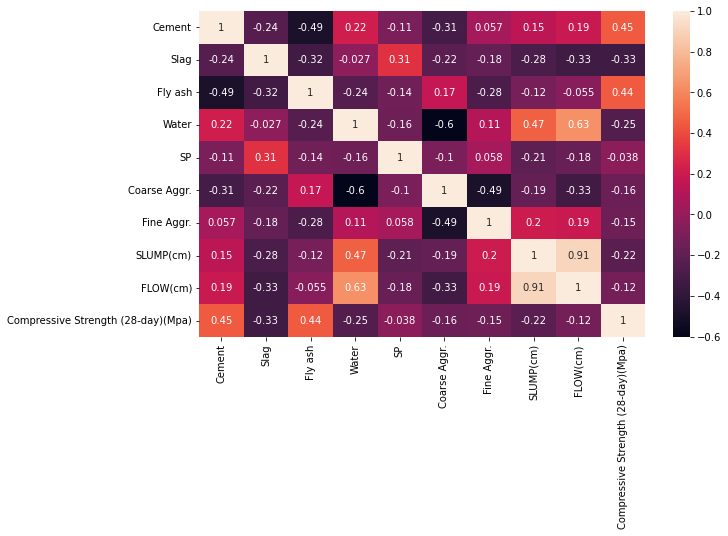

In [14]:
sns.heatmap(df.corr(), annot = True)

# Data Preprocessing 

### Features and target variable

In [15]:
X = df.drop(columns = "Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (82, 9)
Train target shape   :  (82,)
Test features shape  :  (21, 9)
Test target shape    :  (21,)


## Scaling

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [20]:
scaler.fit(X_train) 

StandardScaler()

In [21]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [22]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
        -0.20967429,  0.56267018,  0.70678525,  0.65191812],
       [-0.81306726, -1.29720985,  1.30473577, -0.65655824,  1.53038037,
        -0.33492343,  1.41509971,  0.37338319,  0.3154619 ],
       [ 0.87081264,  0.45936384, -1.64936204,  0.66419403,  0.49979299,
        -0.08442514,  0.09624647,  0.81791927,  0.82014623],
       [ 0.71888363,  0.24594834, -0.27457037, -0.41197449,  0.15626386,
         0.17745943, -0.69184876,  0.81791927,  0.70799416],
       [-0.88903177,  1.09961032,  0.48667792,  0.32177677,  0.84332212,
        -0.676512  , -0.46667869, -0.51568895, -0.58175469],
       [-1.07894304,  1.6085242 ,  0.92979259,  0.61527728,  0.84332212,
        -1.553256  , -0.38626081, -1.68259614, -1.59112335],
       [-0.94727123,  0.70725415,  1.07749748, -0.80820017, -0.63385314,
         0.89251817, -1.39148432, -0.34898792, -0.38548856],
       [ 1.11136691,  0.77127879, -1.64936204,  0.66419403, -0

In [23]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [24]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [25]:
print("X_train_range  :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_range   :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_range  : -2.0542525748610143 - 3.5915551444418226
X_test_range   : -1.9604311827206862 - 2.3157799737499714


##  1. Model Building (Linear Regression)

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [27]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

### 1.1 Interpret the model

In [28]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [34]:
lm.coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [35]:
lm.intercept_

35.84719512195121

In [36]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [37]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual,LSE,ABS
30,45.820,44.889,0.931,0.867,0.931
67,40.340,41.416,-1.076,1.158,1.076
62,28.290,28.566,-0.276,0.076,0.276
47,43.010,39.400,3.610,13.031,3.610
42,33.510,35.143,-1.633,2.667,1.633
40,35.660,39.032,-3.372,11.370,3.372
90,35.520,37.359,-1.839,3.380,1.839
45,31.770,30.865,0.905,0.819,0.905
10,26.020,28.773,-2.753,7.578,2.753
0,34.990,34.471,0.519,0.269,0.519


### 1.2 Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [33]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [38]:
from sklearn.model_selection import cross_validate, cross_val_score

In [39]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [40]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000,0.008,0.945,-1.712,-4.096,-2.024
2,0.000,0.008,0.943,-1.819,-3.996,-1.999
3,0.000,0.000,0.594,-2.811,-11.146,-3.339
4,0.008,0.000,0.688,-2.971,-14.097,-3.755
5,0.008,0.000,0.660,-2.041,-6.364,-2.523
6,0.000,0.000,0.933,-1.192,-1.874,-1.369
7,0.008,0.000,0.908,-2.579,-11.528,-3.395
8,0.000,0.000,0.915,-2.240,-8.029,-2.834
9,0.000,0.000,0.826,-2.685,-11.138,-3.337
10,0.008,0.000,0.850,-2.461,-6.958,-2.638


In [41]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                             0.826
test_neg_mean_absolute_error       -2.251
test_neg_mean_squared_error        -7.923
test_neg_root_mean_squared_error   -2.721
dtype: float64

In [42]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [43]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,4.280
1,-2.223
2,3.932
3,-4.771
4,0.121
5,-5.277
6,-2.611
7,-2.188
8,1.466


In [44]:
residuals = y_test-y_pred

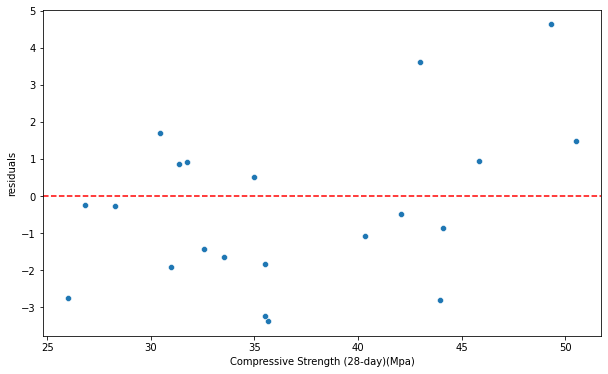

In [45]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Density'>

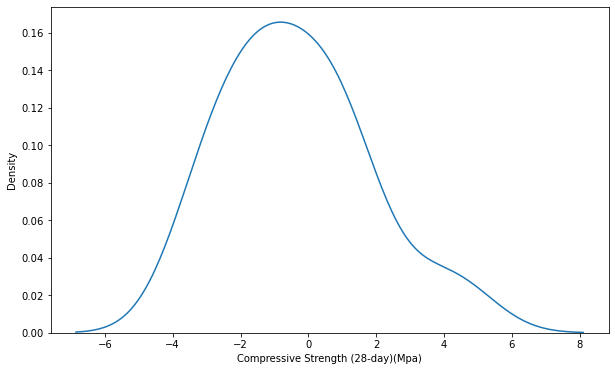

In [46]:
sns.kdeplot(residuals)

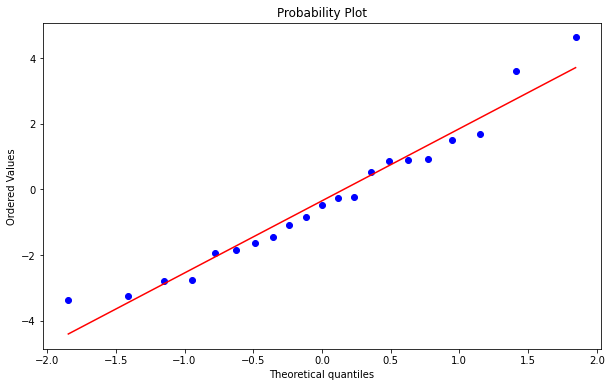

In [47]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [48]:
from scipy.stats import skew
skew(residuals)

0.6026499074920293

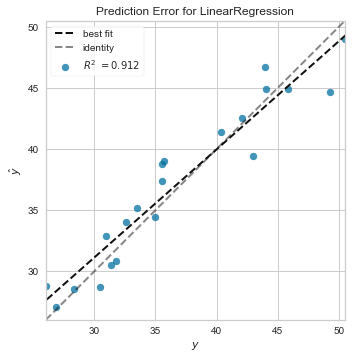

In [49]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridge_model = Ridge(alpha=1)

In [52]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [53]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [54]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [55]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907,0.912,0.906,0.911
mae,1.936,1.740,1.938,1.732
mse,5.874,4.454,5.922,4.493
rmse,2.424,2.111,2.434,2.120


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [58]:
ridge_model = Ridge()

In [59]:
param_grid = {"alpha":alpha_space}

In [60]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [61]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.27; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.52; total time=   0.0s
[CV] END .........................................alpha=0.52; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END .........................................alpha=0.79; total time=   0.0s
[CV] END ..........................................alpha=0.8; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.92; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [62]:
grid_ridge.best_params_

{'alpha': 0.92}

In [63]:
grid_ridge.best_score_

-2.696392988643865

In [64]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [65]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.917,4.485
rmse,2.432,2.118


In [66]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.907,0.912,0.906,0.911,0.906,0.911
mae,1.936,1.740,1.938,1.732,1.938,1.732
mse,5.874,4.454,5.922,4.493,5.917,4.485
rmse,2.424,2.111,2.434,2.120,2.432,2.118


In [69]:
rm = Ridge(alpha=0.92).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rm.coef_

array([ 5.00536166, -1.38916853,  4.79676356, -3.93112534,  0.25813578,
       -4.0917173 , -1.7629051 , -1.96963056,  1.1545175 ])

## 2.2 Lasso (Apply and evalute)

In [70]:
from sklearn.linear_model import Lasso

In [71]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [72]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [73]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


In [74]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168


In [75]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [76]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002,0.001,0.841,-2.871,-11.961,-3.458
2,0.002,0.001,0.851,-2.974,-10.515,-3.243
3,0.000,0.001,0.288,-3.807,-19.544,-4.421
4,0.001,0.001,0.559,-3.283,-19.926,-4.464
5,0.000,0.001,0.378,-2.750,-11.636,-3.411
6,0.000,0.001,0.715,-2.303,-7.945,-2.819
7,0.001,0.000,0.627,-5.206,-46.574,-6.825
8,0.000,0.001,0.854,-2.611,-13.855,-3.722
9,0.001,0.000,0.711,-3.485,-18.501,-4.301
10,0.001,0.001,0.768,-2.910,-10.778,-3.283


In [77]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.659
test_neg_mean_absolute_error        -3.220
test_neg_mean_squared_error        -17.123
test_neg_root_mean_squared_error    -3.995
dtype: float64

In [78]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


In [79]:
lasso_model.coef_

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [80]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [81]:
pd.concat([lm_df, lsm_df], axis = 1)

,lm_coef,lasso_coef_1
0,4.280,4.821
1,-2.223,-0.000
2,3.932,4.880
3,-4.771,-0.820
4,0.121,0.000
5,-5.277,-0.351
6,-2.611,-0.000
7,-2.188,-0.711
8,1.466,-0.000


In [82]:
lasso_model = Lasso(max_iter=100000)

In [83]:
param_grid = {"alpha":alpha_space}

In [84]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [85]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END .........................................alpha=0.28; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.29000000000000004; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.56; total time=   0.0s
[CV] END .........................................alpha=0.56; total time=   0.0s
[CV] END .........................................alpha=0.56; total time=   0.0s
[CV] END .........................................alpha=0.56; total time=   0.0s
[CV] END .........................................alpha=0.56; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.7000000000000001; total time=   0.0s
[CV] END ...........................alpha=0.7000000000000001; total time=   0.0s
[CV] END ...........................alpha=0.7000000000000001; total time=   0.0s
[CV] END ...........................alpha=0.7000000000000001; total time=   0.0s
[CV] END ...........................alpha=0.7000000000000001; total time=   0.0s
[CV] END ...........................alpha=0.7000000000000001; total time=   0.0s
[CV] END ...........................alpha=0.7000000000000001; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [86]:
grid_lasso.best_params_

{'alpha': 0.03}

In [87]:
grid_lasso.best_score_

-2.725010118649377

In [88]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [89]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.905,0.912
mae,1.941,1.722
mse,6.003,4.439
rmse,2.450,2.107


In [90]:
lsm = Lasso(alpha=0.03).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([ 6.34371841, -0.        ,  6.32536397, -2.88078898,  0.42506412,
       -2.38925993, -0.46619636, -1.77863685,  0.92681106])

In [91]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802,0.905,0.912
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466,1.941,1.722
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036,6.003,4.439
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168,2.450,2.107


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [92]:
from sklearn.linear_model import ElasticNet

In [93]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [94]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [95]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [96]:
df_score = pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)
df_score

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802,0.905,0.912,0.637,0.635
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466,1.941,1.722,3.803,3.556
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036,6.003,4.439,22.982,18.466
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168,2.450,2.107,4.794,4.297


In [97]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [98]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.623,-4.218,-28.265,-5.316
2,0.555,-4.782,-31.396,-5.603
3,0.238,-3.950,-20.920,-4.574
4,0.510,-2.980,-22.153,-4.707
5,0.237,-3.124,-14.274,-3.778
6,0.473,-3.323,-14.698,-3.834
7,0.507,-6.127,-61.599,-7.848
8,0.679,-4.149,-30.359,-5.510
9,0.599,-4.202,-25.691,-5.069
10,0.622,-3.941,-17.553,-4.190


In [99]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.504
test_neg_mean_absolute_error        -4.080
test_neg_mean_squared_error        -26.691
test_neg_root_mean_squared_error    -5.043
dtype: float64

In [100]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [101]:
elastic_model.coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [102]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
elastic_model = ElasticNet(max_iter=10000)

In [105]:
param_grid = {"alpha":[0.01, 0.03, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [106]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10)

In [107]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.03, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [108]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [109]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001,0.000,0.000,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.007,-1.823,-3.395,-3.696,-2.398,-1.419,-3.516,-2.736,-3.346,-2.642,-2.698,0.745,1
1,0.001,0.000,0.000,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.000,-1.832,-3.394,-3.715,-2.401,-1.419,-3.482,-2.780,-3.353,-2.659,-2.703,0.744,2
2,0.001,0.000,0.000,0.000,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-1.998,-1.841,-3.394,-3.725,-2.407,-1.422,-3.465,-2.806,-3.357,-2.674,-2.709,0.742,4
3,0.001,0.000,0.000,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-1.997,-1.857,-3.396,-3.737,-2.420,-1.430,-3.450,-2.837,-3.363,-2.706,-2.719,0.740,7
4,0.000,0.000,0.000,0.000,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-1.997,-1.864,-3.398,-3.740,-2.426,-1.433,-3.446,-2.847,-3.365,-2.715,-2.723,0.739,8
5,0.002,0.005,0.000,0.000,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-1.997,-1.871,-3.399,-3.742,-2.433,-1.437,-3.444,-2.856,-3.367,-2.727,-2.727,0.737,12
6,0.001,0.003,0.000,0.000,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-1.997,-1.873,-3.400,-3.743,-2.435,-1.438,-3.444,-2.859,-3.368,-2.732,-2.729,0.737,13
7,0.001,0.001,0.000,0.000,0.030,0.100,"{'alpha': 0.03, 'l1_ratio': 0.1}",-2.061,-1.806,-3.474,-3.598,-2.416,-1.483,-3.730,-2.582,-3.338,-2.608,-2.710,0.752,5
8,0.000,0.000,0.001,0.000,0.030,0.500,"{'alpha': 0.03, 'l1_ratio': 0.5}",-2.024,-1.766,-3.472,-3.639,-2.395,-1.470,-3.634,-2.673,-3.357,-2.631,-2.706,0.756,3
9,0.000,0.000,0.000,0.000,0.030,0.700,"{'alpha': 0.03, 'l1_ratio': 0.7}",-2.006,-1.747,-3.477,-3.664,-2.381,-1.475,-3.587,-2.732,-3.371,-2.659,-2.710,0.759,6


In [110]:
grid_model.best_score_

-2.697733344540697

In [111]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [112]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.907,0.912
mae,1.937,1.731
mse,5.908,4.470
rmse,2.431,2.114
